# Lab 4 — Advection-Diffusion integration

### Tomasz Ogiołda

## Goal

This Jupyter notebook looks at the advection-diffusion equation, which combines two basic ideas: advection, where stuff moves with a flow, and diffusion.

## Setup

In this simulation, we have an initial pulse of concentration (with mass M = 0.5) introduced at a specific location. The advection coefficient u = 0.3 indicates a rightward flow, while the diffusion coefficient D = 0.15 causes the pulse to spread over time.

### Analytical solution

The result of integrated upwind scheme was compared to the following analytical solution:

$$c(x,t) = \frac{M}{A} \cdot \frac{1}{\sqrt{4\pi D}} \cdot \exp{[-\frac{(vt - x)^2}{4Dt}]}$$

In [131]:
import numpy as np
from matplotlib import pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [132]:
class shift:
    def __init__(self, add, sub):
      self.add = add
      self.sub = sub

    def __radd__(self, other):
      return slice(other.start + self.add, other.stop + self.add)

    def __rsub__(self, other):
      return slice(other.start - self.sub, other.stop - self.sub)

In [133]:
t_max = 10
nt = 500
nx = 64
dt = t_max / nt

M = 0.5
A = 0.5
D = 0.15
u = 0.3
L = 10
mu = 0.5

In [134]:

def adv_diff_analytical(x, t):
    exponent = -((u * t - x)**2) / (4 * D * t)
    concentration = M / A * (1 / (2 * np.sqrt(np.pi * D * t))) * np.exp(exponent)
    
    return concentration

def F(psi_l, psi_r, C):
  return .5 * (C + abs(C)) * psi_l + .5 * (C - abs(C)) * psi_r

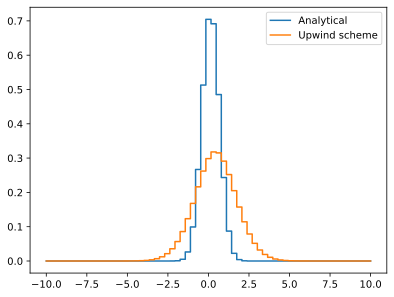

In [135]:
x, dx = np.linspace(-10, L, nx, endpoint=True, retstep=True)

one = shift(add=1, sub=1)
hlf = shift(add=0, sub=1)

i = slice(1, nx-2)
im = slice(1, nx-1)

psi = adv_diff_analytical(x=x, t=1)
C = np.zeros(len(psi) - 1)

solutions = [psi.copy()]

for _ in range(nt):
    adv_C = u * dt / dx
    adv = F(psi[i], psi[i + one], adv_C) - F(psi[i - one], psi[i], adv_C)
    C[im - hlf] = -mu * dt / dx * (psi[im] - psi[im - one]) / dx * (2 / (psi[im] + psi[im - one]))
    diff = F(psi[i], psi[i + one], C[i + hlf]) - F(psi[i - one], psi[i], C[i - hlf])
    
    psi[i] =  psi[i] - (adv + diff)
    solutions += [psi.copy()]
    
time_step = 50
plt.step(x, adv_diff_analytical(x=x, t=time_step*dt), label="Analytical")
plt.step(x, solutions[time_step], label="Upwind scheme")
plt.legend()

### Conclusions

The graph compares an analytical solution (blue line) and an upwind scheme (orange line) for an advection-diffusion problem. The analytical solution is a smooth peak, showing the exact way something moves and spreads. The upwind scheme, a numerical method, looks jagged and less accurate, with a slightly lower peak and small wiggles. It captures the general shape but isn’t as precise as the analytical solution.